In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
crime_data = Path("/Users/nathanialhermann/Desktop/Bootcamp/project-1/Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv")
crime_data_df = pd.read_csv("/Users/nathanialhermann/Desktop/Bootcamp/project-1/Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv")
df = pd.read_csv(crime_data)
df.head()

,CASE_NUMBER,DATE,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,COMMUNITY_AREA,STREET_OUTREACH_ORGANIZATION,AREA,DISTRICT,BEAT,AGE,SEX,RACE,VICTIMIZATION_IUCR_SECONDARY,MONTH,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION
0,JG147400,2/10/23,HOMICIDE,HOMICIDE,YES,SOUTH SHORE,Claretian Associates South Shore,1,3,334,30-39,M,BLK,FIRST DEGREE MURDER,2,6,10,APARTMENT
1,JG214225,4/7/23,HOMICIDE,HOMICIDE,YES,WEST GARFIELD PARK,READI 60624 | INVC West Garfield Park,4,11,1113,20-29,M,BLK,FIRST DEGREE MURDER,4,6,12,STREET
2,JD204846,4/8/20,BATTERY,BATTERY,YES,AUSTIN,INVC Austin,5,25,2532,20-29,M,BLK,AGGRAVATED - HANDGUN,4,4,14,STREET
3,JD204846,4/8/20,BATTERY,BATTERY,YES,AUSTIN,INVC Austin,5,25,2532,20-29,M,BLK,AGGRAVATED - HANDGUN,4,4,14,STREET
4,JD382340,9/28/20,BATTERY,BATTERY,YES,AUSTIN,INVC Austin,5,25,2532,UNKNOWN,UNKNOWN,UNKNOWN,AGGRAVATED - HANDGUN,9,2,17,STREET


In [4]:
x_axis = np.arange(len(crime_data_df))
tick_locations = [value+0.4 for value in x_axis]

In [5]:
incident_type = crime_data_df.groupby('COMMUNITY_AREA')
count_incident_type = incident_type['INCIDENT_PRIMARY'].count()

count_incident_type


COMMUNITY_AREA
AUSTIN                    3898
EAST GARFIELD PARK        1577
ENGLEWOOD                 2117
GREATER GRAND CROSSING    1217
NORTH LAWNDALE            2356
RIVERDALE                  381
SOUTH SHORE               1229
WASHINGTON PARK            581
WEST ENGLEWOOD            2283
WEST GARFIELD PARK        1845
Name: INCIDENT_PRIMARY, dtype: int64

<IPython.core.display.Javascript object>


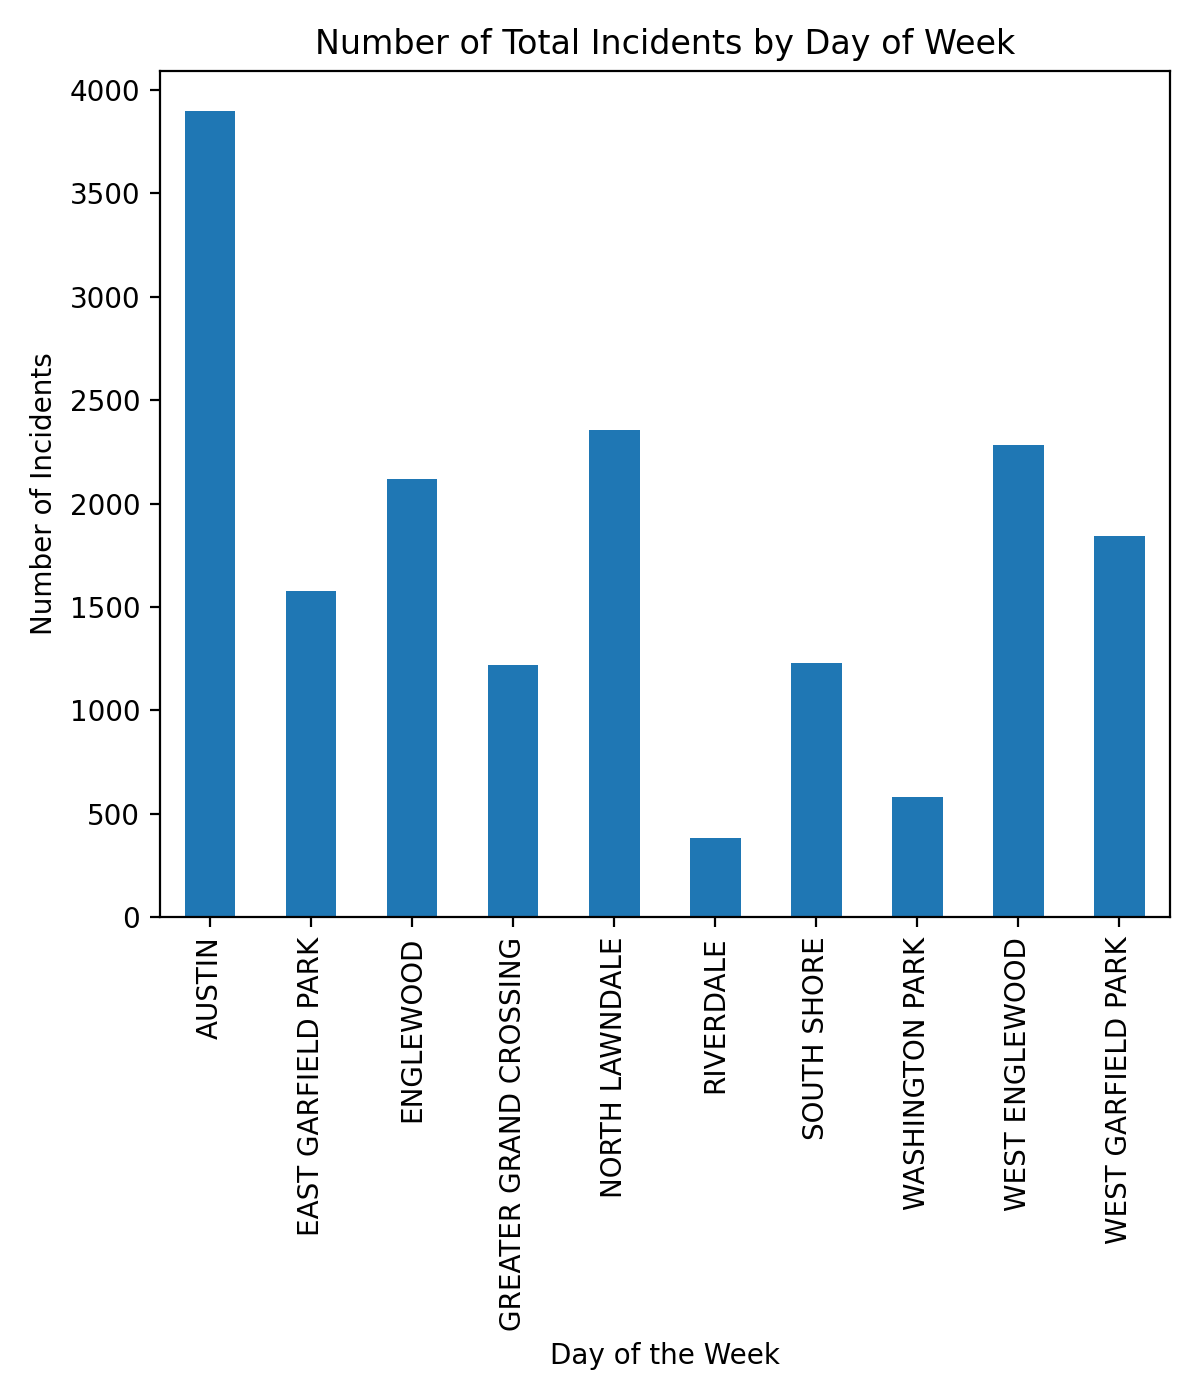

In [6]:
count_chart = count_incident_type.plot(kind='bar', figsize=(6,7))
plt.xticks(rotation=90)
count_chart.set_xlabel("Community")
count_chart.set_ylabel("Number of Incidents")
count_chart.set_title("Number of Total Incidents per Community")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


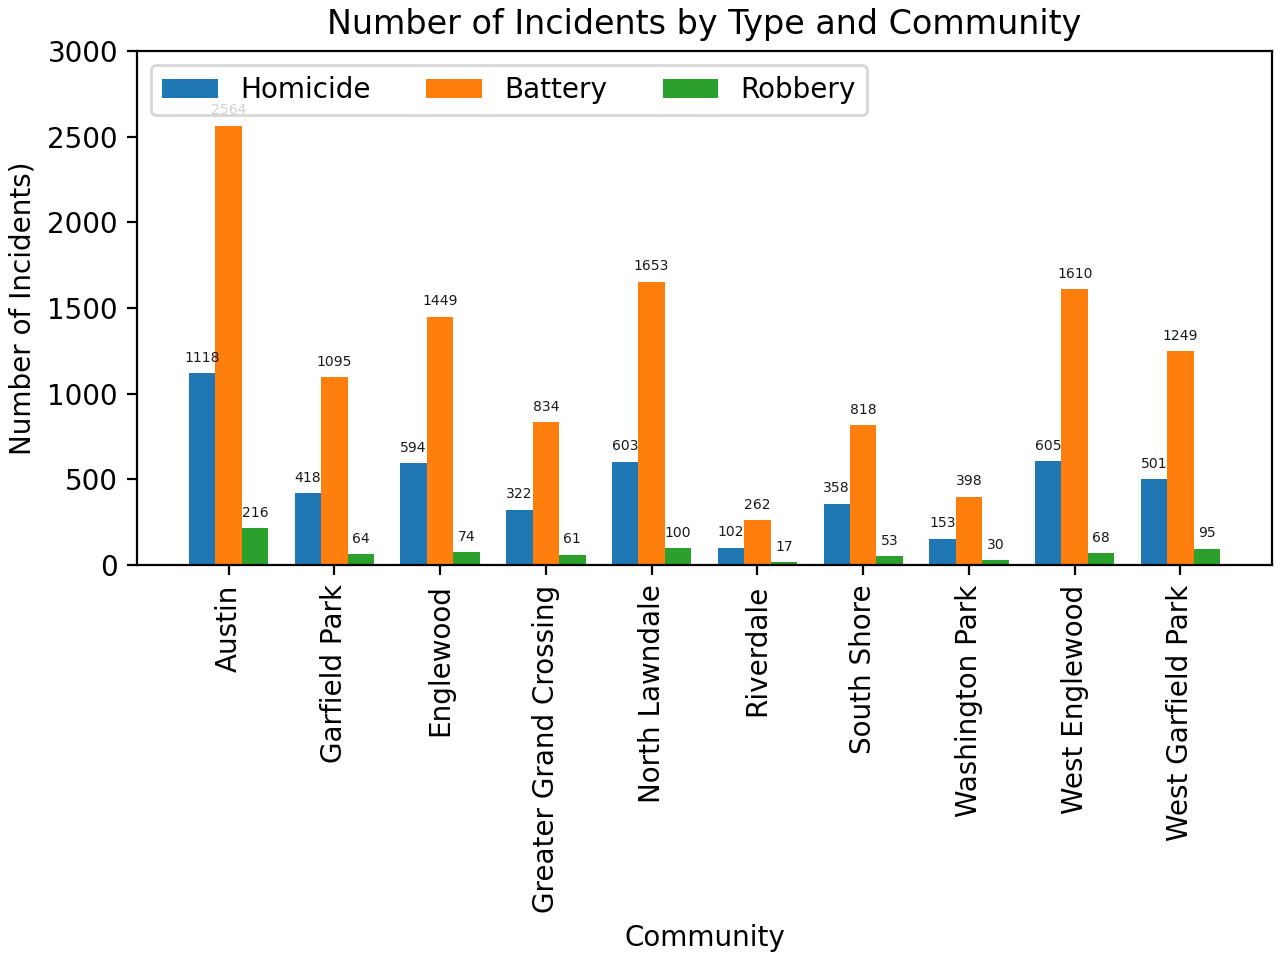

In [10]:
area = ("Austin", "Garfield Park", "Englewood", "Greater Grand Crossing", "North Lawndale","Riverdale","South Shore",
           "Washington Park", "West Englewood", "West Garfield Park")
incident_types = {
    'Homicide': (1118, 418, 594, 322, 603, 102, 358, 153, 605, 501),
    'Battery': (2564, 1095, 1449, 834, 1653, 262, 818, 398, 1610, 1249),
    'Robbery': (216, 64, 74, 61, 100, 17, 53, 30, 68, 95),
}
x = np.arange(len(area))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in incident_types.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, alpha=0.9, fontsize=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Incidents)')
ax.set_xlabel('Community')
ax.set_title('Number of Incidents by Type and Community')
ax.set_xticks(x + width, area, rotation=(90))
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3000)


plt.show()

In [8]:
week_day = crime_data_df.groupby('DAY_OF_WEEK')
weekday_count = week_day['DAY_OF_WEEK'].count()

weekday_count

DAY_OF_WEEK
1    3250
2    2379
3    2069
4    2187
5    2085
6    2280
7    3234
Name: DAY_OF_WEEK, dtype: int64

In [9]:
weekday_chart = weekday_count.plot(kind='bar', figsize=(6,10))
plt.xticks(rotation=90)
count_chart.set_xlabel("Day of the Week")
count_chart.set_ylabel("Number of Incidents")
count_chart.set_title("Number of Total Incidents by Day of Week")
plt.tight_layout()
plt.show()

/var/folders/p1/dq82670s7m3_n6slwk8wznt40000gn/T/ipykernel_4600/612626685.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
